In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set(style='ticks')
# pandas defaults
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
# color default
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Green, CB91_Pink, CB91_Purple, CB91_Violet, CB91_Amber]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [2]:
import IPython.display as ipd
import os
import pathlib 

In [3]:
import librosa
import librosa.display

In [4]:
def remove_grid_lines(axs):
    """Remove the default grid lines from a collection of axies."""
    for ax in axs.flatten():
        ax.grid(False)

In [5]:
# load an audio file
audio_file = "audio/test_sounds/HB_and_Sperm/humpback whale1-Copy1.wav"

In [6]:
# ipd.Audio(audio_file)

In [7]:
# audio[0].shape

In [8]:
# extract MFCCs
mfccs = librosa.feature.mfcc(signal, n_mfcc=13, sr=sr)

NameError: name 'signal' is not defined

In [ ]:
mfccs.shape

In [9]:
# Visualize MFCCs
plt.figure(figsize=(6,6))


librosa.display.specshow(mfccs,
                        x_axis="time",
                        sr=sr)
plt.title('Extracing (MFCCs) Humpback Whale')
plt.colorbar(format="%+2f")
plt.savefig("images/extractMFCCsHumpback3.png", bbox_inches='tight')
plt.show();

NameError: name 'mfccs' is not defined

<Figure size 432x432 with 0 Axes>

In [ ]:
# Calculate delta and delta2 MFCCs
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [ ]:
delta_mfccs.shape

In [ ]:
# Visualize MFCCs delta
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfccs,
                        x_axis="time",
                        sr=sr)

plt.colorbar(format="%+2f")
plt.show();

In [ ]:
# Visualize MFCCs delta2
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfccs,
                        x_axis="time",
                        sr=sr)

plt.colorbar(format="%+2f")
plt.show();

In [ ]:
comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [ ]:
comprehensive_mfccs.shape

In [10]:
with open("plotmfcc.json", "r") as fp:
    data = json.load(fp)
    X = data['mfcc']

In [12]:
mfccstest = np.array(X)

mfccstest.T[0].shape

(130, 10)

# Plot one of 10 mfccs from file

In [13]:
# Visualize MFCCs
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccstest[3].T,
                        x_axis="time",
                        sr=sr)

plt.colorbar(format="%+2f")
plt.show();

NameError: name 'sr' is not defined

<Figure size 1800x720 with 0 Axes>

# Plot the Extracted MFCCs , the 10 segments on one fig

In [ ]:
nrow = 2; ncol = 5;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(17,8))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Extracing Mel-frequency cepstral coefficients (MFCCs) Humpback Whale')

for i, ax in enumerate(axs.flatten()):
    img = librosa.display.specshow(mfccstest[i].T,
                        x_axis="time",
                        sr=sr, ax=ax)
    
    ax.set(title=f"MFCC Segment_{i}", xlabel='Time', ylabel='Coefs')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(img, cax=cbar_ax, format="%+2f")
plt.savefig("images/extractMFCCsHumpback3.png", bbox_inches='tight')
plt.show();


# import model and plot filters

In [15]:
import os
import tensorflow as tf
from tensorflow import keras
import json 
print(tf.version.VERSION)

2.3.1


In [16]:
# import saved model
cnn_model = tf.keras.models.load_model('saved_model/cnn models/mfccModel6_w_dropout/')

In [17]:
# Get the weights from the Convet model
weights1_np = cnn_model.get_weights()[0]

In [18]:
weights1_np.shape

(3, 3, 1, 32)

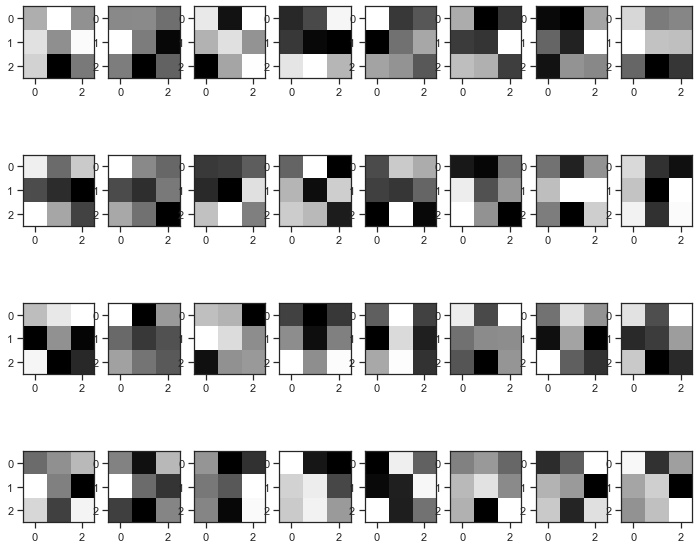

In [19]:
# Plot the Convets 1st 32 filters from model
fig, axs = plt.subplots(4, 8, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate(axs.flatten()):
    filter = weights1_np[:, :, 0, i]
    ax.imshow(filter, cmap=plt.cm.gray_r, interpolation="nearest")
remove_grid_lines(axs)

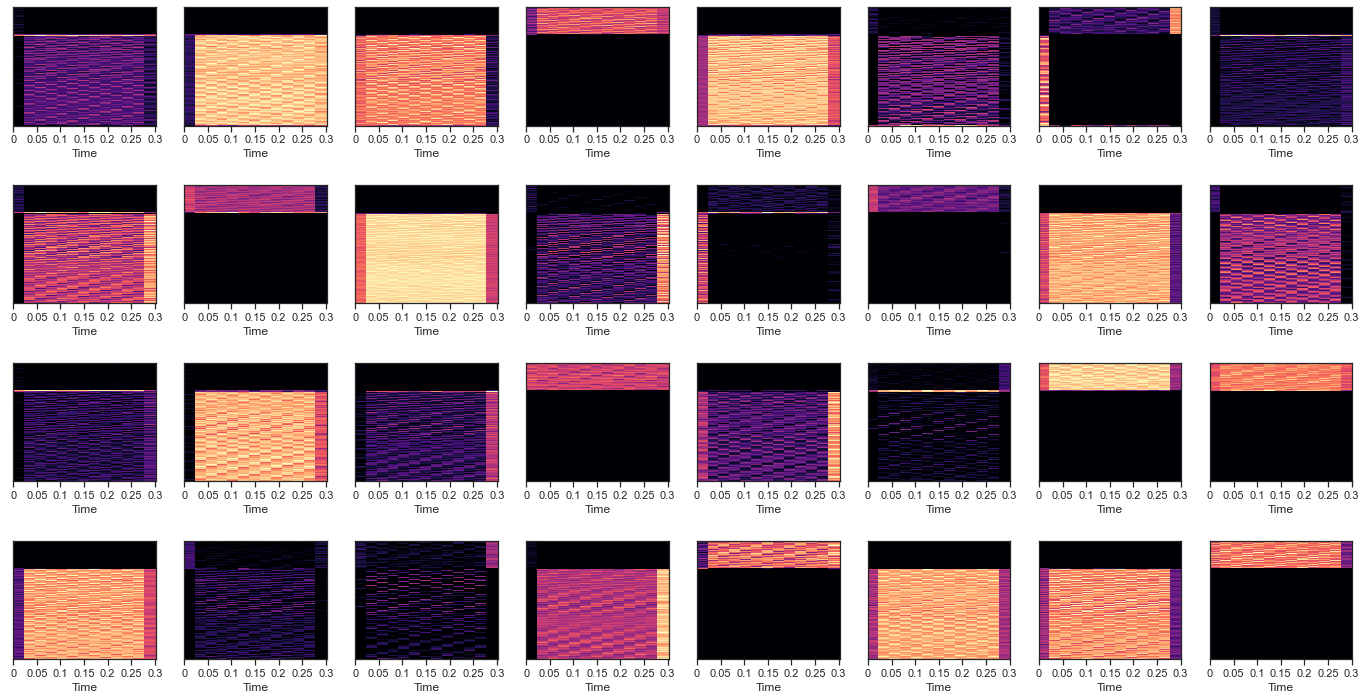

In [22]:
# Plot the 32 ConVnet 1st layer filter on one sample mfcc
# You can also plot with all segments by  test = mfccstest.T and changing the reshape to 10,130,13,1
test = mfccstest.T
zero_tensor = tf.constant(test.reshape(10,130,13,1))
zero_activations = tf.nn.conv2d(
    zero_tensor, weights1_np, strides=[1,1,1,1], padding='SAME'
)
# or keras.activations.relu(zero_activations)
zero_activations_relu = np.maximum(zero_activations,0) 
# plot
fig, axs = plt.subplots(4, 8, figsize=(24, 12))
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate(axs.flatten()):
    librosa.display.specshow(zero_activations_relu[0,:,:,i],
                        x_axis="time",
                        sr=22050, ax=ax)
    
remove_grid_lines(axs)